In [1]:
import numpy as np #Imports Python mathematical functions library
import matplotlib.pyplot as plt #Imports plot library

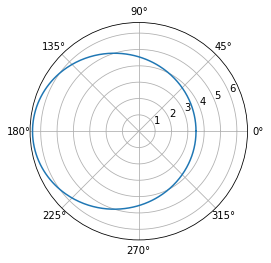

In [2]:
cos = np.cos
pi = np.pi

a = 5
e = 0.3
theta = np.linspace(0,2*pi, 360)
r = (a*(1-e**2))/(1+e*cos(theta))
plt.polar(theta, r)

#print(np.c_[r,theta])

plt.show()

In [15]:
# Parameters definition

GM = 4*pi*pi # UA^3 / yr^2

n = 200

v_0 = 2.*pi # UA/yr
r_0 = 1. # UA
the_0 = 0.
dt = 2e-2 # yr

e_n = [] # M* AU^2/yr^2
x_pos = [] # UA
y_pos = [] # UA
r_pos = []
th_pos = []
m = 1. #e-5 # Solar Mass

a = 1.1
e = 0.3

# Functions definition

def acce_i(r):
    return -GM / (r*r*r)

def ener(r):
    return -(GM*m) / (2*r)

def elipRadio(theta):
    return (a*(1-e**2))/(1+e*cos(theta))

In [16]:
# Euler method

x_n = r_0
y_n = 0.
vx_n = 0.
vy_n = v_0

th = 0.
r_n = elipRadio(th)

e_n.append( ener(r_n) )
x_pos.append( x_n )
y_pos.append( x_n )
r_pos.append( r_n )
th_pos.append( th )

for t in range(n):
    tmp_x = x_n
    tmp_y = y_n
    tmp_th = th
    
    vx_n = vx_n + tmp_x*acce_i(r_n)*dt
    vy_n = vy_n + tmp_y*acce_i(r_n)*dt
    
    x_n = tmp_x + vx_n*dt
    y_n = tmp_y + vy_n*dt
      
    th = tmp_th + ( np.sqrt(vx_n*vx_n + vy_n*vy_n)/r_n ) * dt
    r_n = elipRadio(th)
        
    e_n.append( ener(r_n) )
    x_pos.append( x_n )
    y_pos.append( y_n )
    r_pos.append( r_n )
    th_pos.append( th )

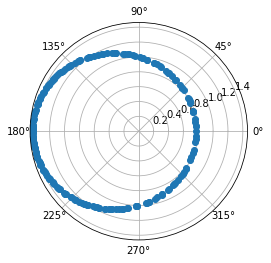

In [17]:
plt.polar(th_pos,r_pos,'o')
plt.show()